<a href="https://colab.research.google.com/github/Aqdusc/icp_data/blob/main/ICP_1_Aqdus_Charolia_16304192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
url='https://raw.githubusercontent.com/Aqdusc/icp_data/main/Data.csv'
df= pd.read_csv(url)
print(df)

           id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]


In [3]:
I = df.iloc[:,2:32]  #independent columns
D = df.iloc[:,1] #dependent column which is the diagnosis

In [4]:
#Performing the numerical encoding of the categorical variable which is diagnosis, so 1:M and 0:B
le = LabelEncoder()
D_E = le.fit_transform(D)

df['diagnosis'] =D_E
print(df)

           id  diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302          1  ...                  0.11890          NaN
1      842517          1  ...                  0.08902          NaN
2    84300903          1  ...                  0.08758          NaN
3    84348301          1  ...                  0.17300          NaN
4    84358402          1  ...                  0.07678          NaN
..        ...        ...  ...                      ...          ...
564    926424          1  ...                  0.07115          NaN
565    926682          1  ...                  0.06637          NaN
566    926954          1  ...                  0.07820          NaN
567    927241          1  ...                  0.12400          NaN
568     92751          0  ...                  0.07039          NaN

[569 rows x 33 columns]


'what we see in the heatmap is that there is a strong correlation of the following independent variable on the diagnosis variable\nI have assumed the cutoff to be >0.7 in the correlation matrix\nradius_mean\nperimeter_mean\narea_mean\nconcave points_mean\nradius_worst\nperimeter_worst\narea_worst\nconcave_points_worst'

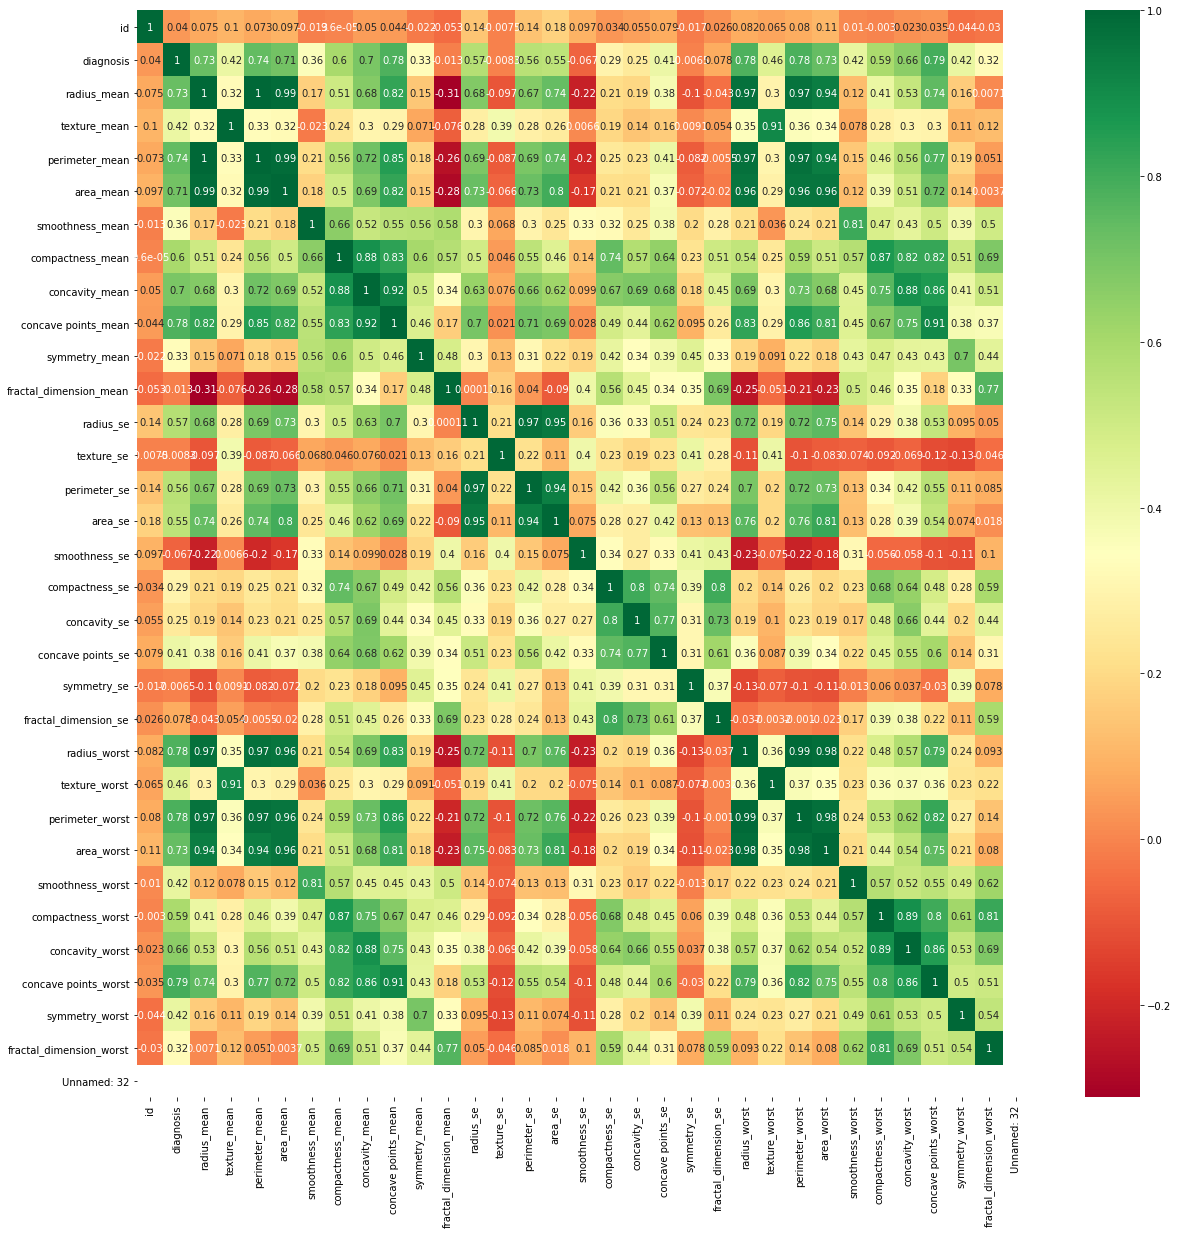

In [5]:
#now finding correlation of each feature in the dataset using a heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
'''what we see in the heatmap is that there is a strong correlation of the following independent variable on the diagnosis variable
I have assumed the cutoff to be >0.7 in the correlation matrix
radius_mean
perimeter_mean
area_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concave_points_worst'''

In [6]:
#Performing Univariate Selection on the dataset using chisquared test to find the 5 independent variables affecting the diagnosis as M or B
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

I = df.iloc[:,2:32]  #independent columns
D= df.iloc[:,1]    #target column i.e diagnosis
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(I,D)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(I.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864


[0.04687314 0.01846762 0.07256924 0.03671058 0.00891995 0.01798577
 0.07915982 0.08445971 0.00719715 0.00697096 0.01531437 0.00517166
 0.0119384  0.02595351 0.00657382 0.00815974 0.01132444 0.00963846
 0.00593634 0.00487327 0.09060105 0.0266686  0.09160433 0.07626111
 0.02078424 0.03086791 0.0484255  0.1054422  0.01779276 0.00735432]


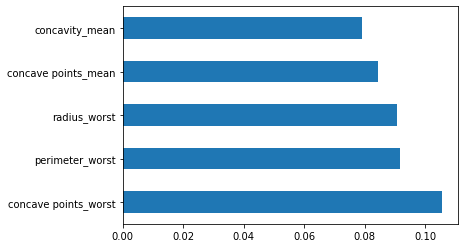

In [7]:
#now here i am performing feature importance on the dataset to find the most important variables affecting the dependent variable which is diagnosis
# i am using extra tree classifier for this process
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(I,D)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=I.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
#as we can see the perimeter_worst is the variable affecting the diagnosis variable the most.